### Part 1: Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
# import libraries that will be used
import pandas as pd
import json
import datetime as dt
import matplotlib.pyplot as plt

Begin by reading in the json file as a pandas dataframe

In [2]:
df = pd.read_json('logins.json')

type(df)

pandas.core.frame.DataFrame

Examine dataset

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


There are 93142 non-null rows that are of datetime format.

Next, set 'login_time' as the index so that the timeseries functions can be used more easily.

In [5]:
df.set_index('login_time', inplace=True)

Add a 'count' column to the dataframe. Then, resample the data into 15 minute intervals. A count of logins for every 15 minutes will result.

In [6]:
df['count'] = 1
df=df.resample('15min').sum()
df

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


Now begin visualizing the data.

Text(0, 0.5, 'Login Count')

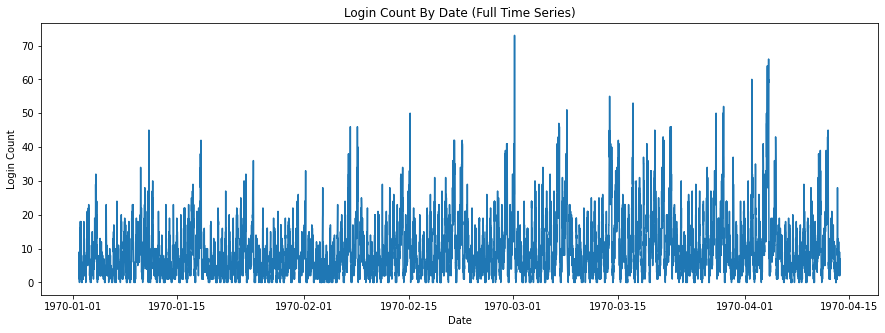

In [7]:
# plot the login counts per 15 minute interval across the entire series
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df)
ax.set_title('Login Count By Date (Full Time Series)')
ax.set_xlabel('Date')
ax.set_ylabel('Login Count')

Text(0.5, 0, 'month')

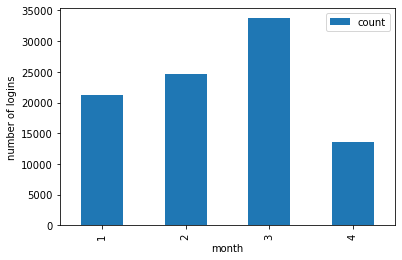

In [8]:
#index by month. This will show the number of logins per month (1=Jan, 2=Feb, 3=Mar, 4=Apr)
index_month = df.index.month
count_by_month = df.groupby(index_month).sum()
ax = count_by_month.plot(kind='bar')
ax.set_ylabel('number of logins')
ax.set_xlabel('month')


March saw the greatest number of logins, at about 33,000. April had the lowest number, at about 13,500, but this makes sense, since data collection stopped on April 13, so only half the month's worth of data was collected. January had the second lowest number of logins. The summary statistics (below) gives actual numbers to compare.

In [9]:
count_by_month.describe()

,count
count,4.000000
mean,23285.500000
std,8380.011675
min,13507.000000
25%,19306.000000
50%,22956.000000
75%,26935.500000
max,33723.000000


Next examine the days of the week (0=Monday, 1=Tuesday,..., 6=Sunday)

Text(0, 0.5, 'average number of logins')

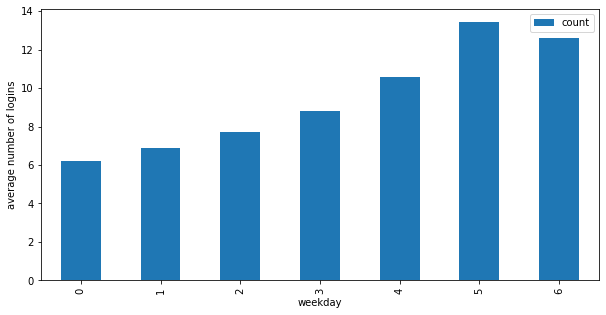

In [10]:
index_weekday = df.index.weekday
count_by_weekday = df.groupby(index_weekday).mean()
ax = count_by_weekday.plot(kind='bar', figsize=(10,5))
ax.set_xlabel('weekday')
ax.set_ylabel('average number of logins')


Logins are lowest during the weekdays, increasing gradually until Saturday and Sunday.
Next examine hours of the day that logins are most common.

Text(0, 0.5, 'average number of logins')

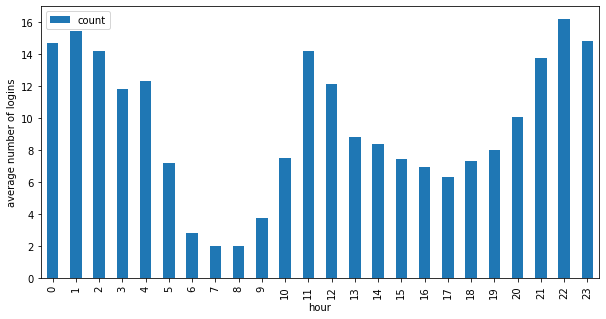

In [11]:
index_hour = df.index.hour
count_by_hour = df.groupby(index_hour).mean()
ax = count_by_hour.plot(kind='bar', figsize=(10,5))
ax.set_xlabel('hour')
ax.set_ylabel('average number of logins')


Logins are least common in the morning between 6-9am. There seem to be 2 peak login time ranges: between 11am-12pm and between 9pm-2am. The greatest amount of logins occur between 9pm-4am.

There do not appear to be any data quality issues, other than that the year of collection does not make sense (1970). The trends in login times and days make sense, since logins are most often during busy times (midday for lunch and evenings and weekends when people go out for dinner/entertainment).

### Part 2: Experiment and metrics design.

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
<br> a. how you will implement the experiment
<br> b. what statistical test(s) you will conduct to verify the significance of the
observation
<br>c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
There are many options for measuring success. Some of the options to consider include:

- customer retention
- customer satisfaction/ratings
- usage/number of trips
- net revenues
- driver retention 
- number of ride cancellations
- number of rides accepted
- number of trips per user
- number of bridge crossings

As the top measure of success, I would choose <u>customer retention</u>, since this would be an easy and clear measure of success for a short-term experiment. Revenue should be a measure of success in the long-term, but it is too complicated to measure for a short-term experiment, as there are too many factors (like different company expenses and receivables) and coming into play with its value. If customers are being retained, this means that they are fine with the change. <u>Usage/number of trips</u> would be a close second key measure of success, because if level of usage increases, this means that the new process is effective in capturing more of the market.



#### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
<br>
<b>a. how you will implement the experiment</b>
<br>
I would implement a phased approach. I would make sure to conduct the experiment during 'normal' times - (e.g., taking into account seasonal patterns and avoiding consecutive weeks when ride usage typically varies away from the mean). I'd suggest running Phase 1 for a period of 2 weeks to 1 month, assessing key metrics at each of those time points. If all goes well, proceed to Phase 2 (running this phase for period of 2 weeks to 1 month, assessing key metrics at those time points), and continue forward to Phase 3 in the same manner. 
<br>- Phase 1: Reimburse toll costs for a small percentage of randomly-selected drivers (~20%)
<br>- Phase 2: Reimburse toll costs for a 50% of randomly-selected drivers
<br>- Phase 3: Reimbursing toll costs for all drivers
<br> Depending on the age of the company (considering this could be a young startup),  key metrics in each phase either should be compared with those metrics of the previous year at the same time, OR with key metrics of the previous month, in order to gain more certainty around the results. Holidays/weeks when usage would expectedly vary from the mean should be avoided. 
<br>
<br> The null hypothesis of this experiment is that implementing the change will not affect customer retention.
<br> The alternative hypothesis is that implementing the change will increase customer retention.
<br>
<br> 
<b>b. what statistical test(s) you will conduct to verify the significance of the observation</b>
<br>
Statistical tests could be conducted at the 2-week and 1-month mark of each phase.

A chi-square test could be used to compare the number of users retained vs. not retained (compared Phase 1 usage with usage from previous year or a 2-week/1 month period, avoiding holidays/weeks when usage would expectedly vary from the mean)

A one-sided t-test could be used, to compare the mean number of rides in each phase, comparing usage in the previous year.

<br>
 <b>c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.</b>
<br>
At each phase, if the proportion of customers retained was equal to or higher with reimbursed tolls, and customer usage went up or remained the same, I would look at other key metrics, including bridge usage (are we affecting behavior?), customer satisfaction, driver retention (is anything about the new process affecting employee satisfaction?), and eventually net revenues. Seasonality and economic climate (for example, a pandemic such as we are experiencing would reduce usage considerably) should be taken into account when looking at the results of the experiment.


### Part 3: Predictive modeling.

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice).
<br>Data description
<br>● city: city this user signed up in
<br>● phone: primary device for this user
<br>● signup_date: date of account registration; in the form ‘YYYYMMDD’
<br>● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
<br>● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
<br>● avg_rating_by_driver: the rider’s average rating over all of their trips
<br>● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
<br>● surge_pct: the percent of trips taken with surge multiplier > 1
<br>● avg_surge: The average surge multiplier over all of this user’s trips
<br>● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
<br>● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
<br>● weekday_pct: the percent of the user’s trips occurring during a weekday

<b>1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?</b>

<b>Step 1: Import data and libraries
<br>Step 2: Check for nulls and outliers:</b>
<br>- look at summary of dataframe
<br>- look at summary statistics and plot histograms/boxplots for various features to detect outliers
<br>
<b>Step 3: Create a column for the target variable (retained=1/lost=0), based on more than 1 trip in the first 30 days</b>
<br>- Determine fraction of observed users that were retained.



In [12]:
df2 = pd.read_json('ultimate_data_challenge.json')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Looking at the dataframe summary, there are 50000 rows and 12 columns. The following rows have null values: 
- avg_rating_of_driver
- phone
- avg_rating_by_driver

In [13]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
#examining 'phone' column that contains nulls:
df2.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

Addressing nulls - to do:
- Null values (around 400) in the 'phone' column will be replaced with 'iPhone', since the majority of customers use iPhone.
- Null values in the 'avg' columns can be replaced with the means of the columns. 


In [15]:
df2['phone'] = df2['phone'].fillna('iPhone')
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean())
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Addressing date columns - to do: 
- signup_date and last_trip_date will be converted to datetime format

In [16]:
df2['signup_date'] = pd.to_datetime(df2['signup_date'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

Create column 'active' which identifies customers who are still active 6 months after signing up.


In [17]:
df2['active'] = (df2['last_trip_date'].max() - df2['last_trip_date']) <= '30 days'
df2.active.value_counts(normalize=True)

False    0.62392
True     0.37608
Name: active, dtype: float64

The dataset classes are imbalanced, with 38% of customers active after 6 months. This imbalance will be addressed when creating the machine learning model.


In [18]:
#viewing some of the active customers
df2[df2['active'] == True].head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0,True
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0,True


In [19]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


There appear to be outliers in trips_in_first_30_days and avg_dist. These will be further examined with boxplots.


<AxesSubplot:>

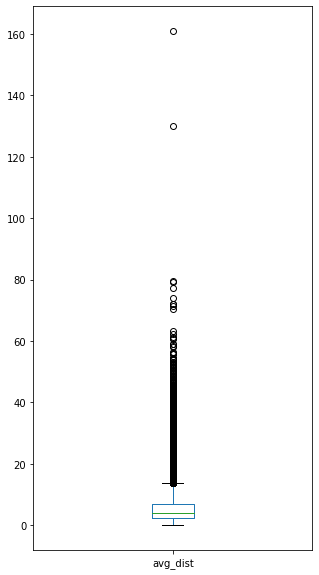

In [20]:
df2.avg_dist.plot(kind='box', figsize=(5,10))

Based on the boxplot, avg_distance values over 100 will be removed.

In [21]:
df2 = df2[df2.avg_dist <= 100]
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49998 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49998 non-null  object        
 1   trips_in_first_30_days  49998 non-null  int64         
 2   signup_date             49998 non-null  datetime64[ns]
 3   avg_rating_of_driver    49998 non-null  float64       
 4   avg_surge               49998 non-null  float64       
 5   last_trip_date          49998 non-null  datetime64[ns]
 6   phone                   49998 non-null  object        
 7   surge_pct               49998 non-null  float64       
 8   ultimate_black_user     49998 non-null  bool          
 9   weekday_pct             49998 non-null  float64       
 10  avg_dist                49998 non-null  float64       
 11  avg_rating_by_driver    49998 non-null  float64       
 12  active                  49998 non-null  bool  

<AxesSubplot:>

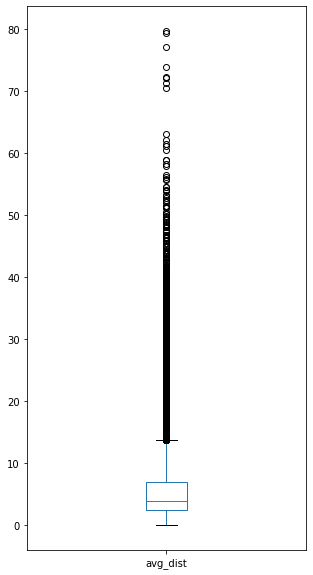

In [22]:
df2.avg_dist.plot(kind='box', figsize=(5,10))

<AxesSubplot:>

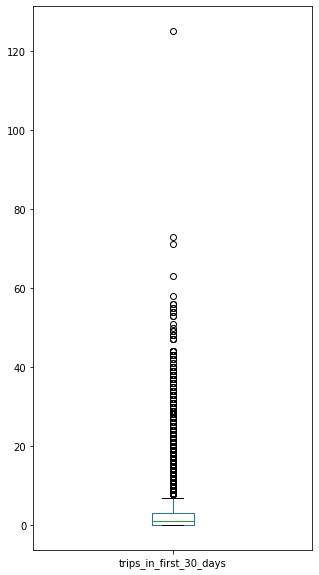

In [23]:
df2.trips_in_first_30_days.plot(kind='box', figsize=(5,10))

The one outlier will be removed here (>120 trips)

<AxesSubplot:>

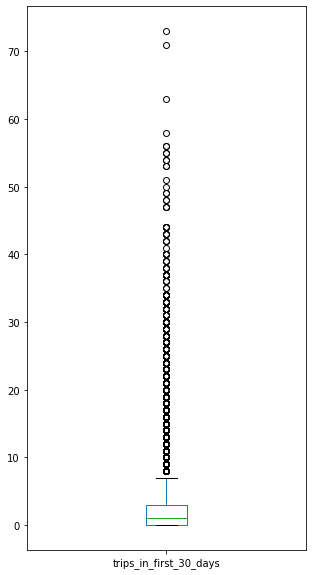

In [24]:
df2 = df2[df2.trips_in_first_30_days <=120]
df2.trips_in_first_30_days.plot(kind='box', figsize=(5,10))

In [25]:
df2.ultimate_black_user.value_counts(normalize=True)

False    0.622917
True     0.377083
Name: ultimate_black_user, dtype: float64

#### 38% of customers are ultimate black users

<AxesSubplot:xlabel='active'>

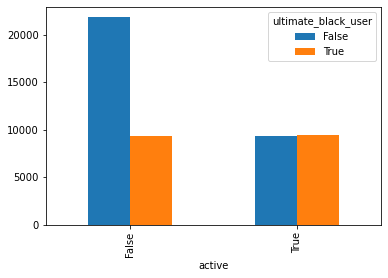

In [26]:
df2.groupby(['ultimate_black_user','active'])['ultimate_black_user'].count().unstack(level=0).plot(kind='bar')


For the active customers, about 50% are ultimate black users. For inactive users, about 30% were ultimate black users.

<AxesSubplot:>

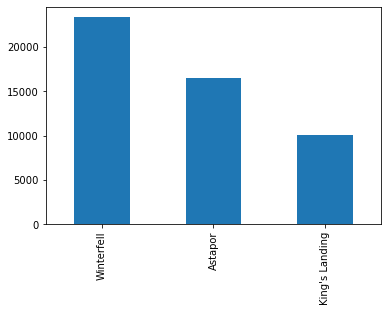

In [27]:
df2.city.value_counts().plot(kind='bar')

Most users signed up in Winterfell

<AxesSubplot:xlabel='active'>

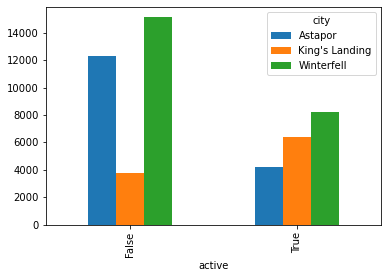

In [28]:
df2.groupby(['city','active'])['active'].count().unstack(level=0).plot(kind='bar')


The greatest numbers of users in both groups signed up in Winterfell. A greater proportion of active users signed up in King's Landing, compared with inactive users.

No relationship with phone type and active/inactive customer.

<AxesSubplot:>

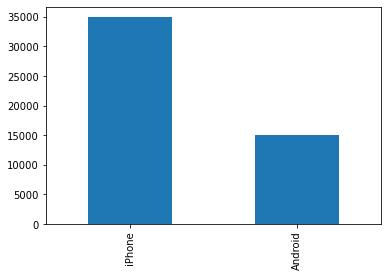

In [29]:
df2.phone.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='active'>

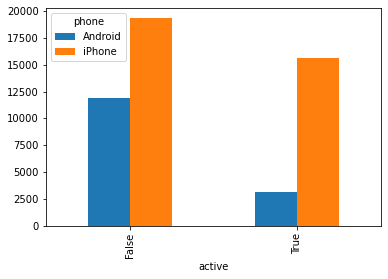

In [30]:
df2.groupby(['phone','active'])['phone'].count().unstack(level=0).plot(kind='bar')


Most users have iPhones

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

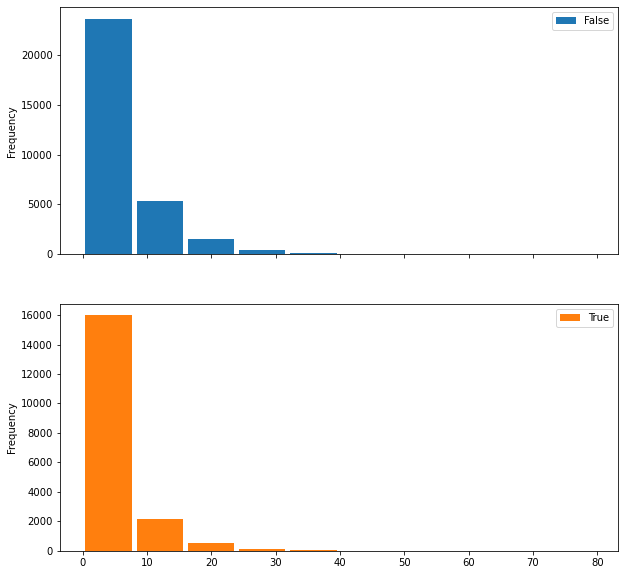

In [31]:
df2.pivot(columns='active', values='avg_dist').plot(kind='hist', subplots=True, rwidth=0.9, align='mid', figsize=(10,10))


The majority of users (active and inactive) travel less than 10 miles

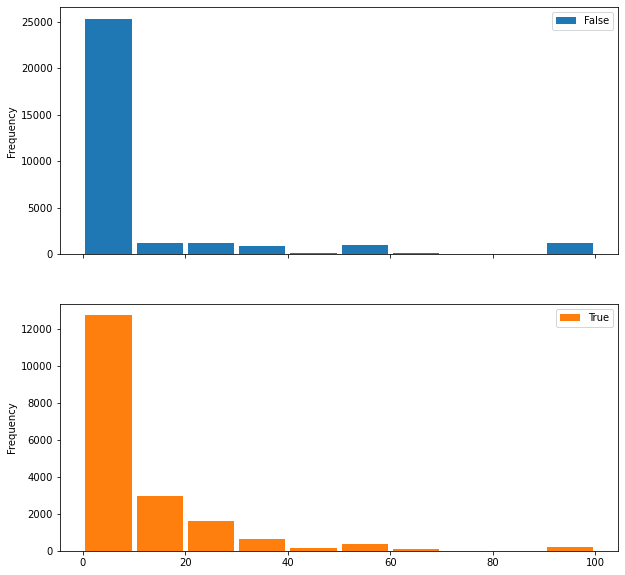

In [32]:
ax = df2.pivot(columns='active', values='surge_pct').plot(kind='hist', subplots=True, rwidth=0.9, align='mid', figsize=(10,10))


The lower the surge percent, the higher the number of customers. There are small spikes at the 50 and 100 percent surge rates, most likely due to times of extreme customer demand (possibly when other modes of transportation are not available -e.g., the trains are not running- or when there is an event happening that increases usage)

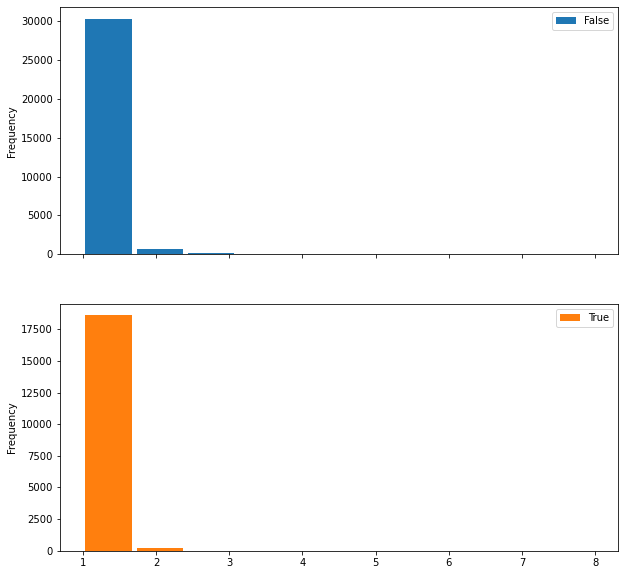

In [33]:
ax = df2.pivot(columns='active', values='avg_surge').plot(kind='hist', subplots=True, rwidth=0.9, align='mid', figsize=(10,10))


<AxesSubplot:>

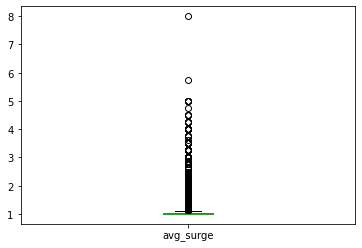

In [34]:
df2.avg_surge.plot(kind='box')

The average surge multiplier over all of a users trip's is about 1.

In [35]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,49997.000000,49997.000000,49997.000000,49997.000000,49997.00000,49997.000000,49997.000000
mean,2.275837,4.601551,1.074766,8.849779,60.92630,5.791317,4.778153
std,3.752848,0.564991,0.222342,19.959316,37.08117,5.637908,0.445765
min,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.30000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.70000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.00000,6.940000,5.000000
max,73.000000,5.000000,8.000000,100.000000,100.00000,79.690000,5.000000


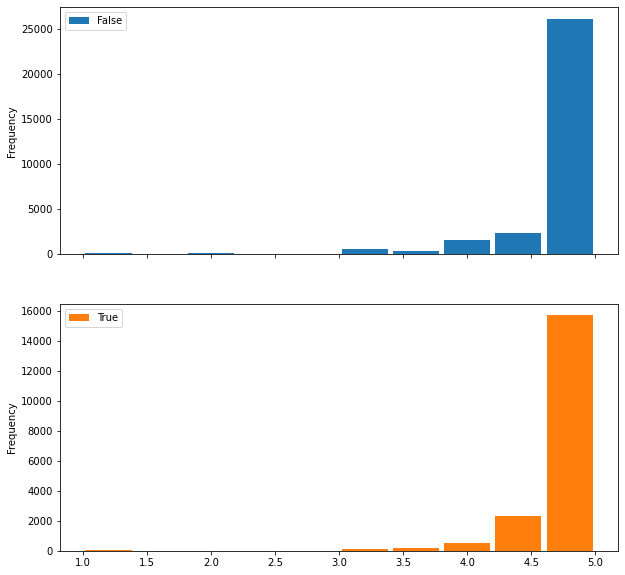

In [36]:
ax = df2.pivot(columns='active', values='avg_rating_by_driver').plot(kind='hist', subplots=True, rwidth=0.9, align='mid', figsize=(10,10))


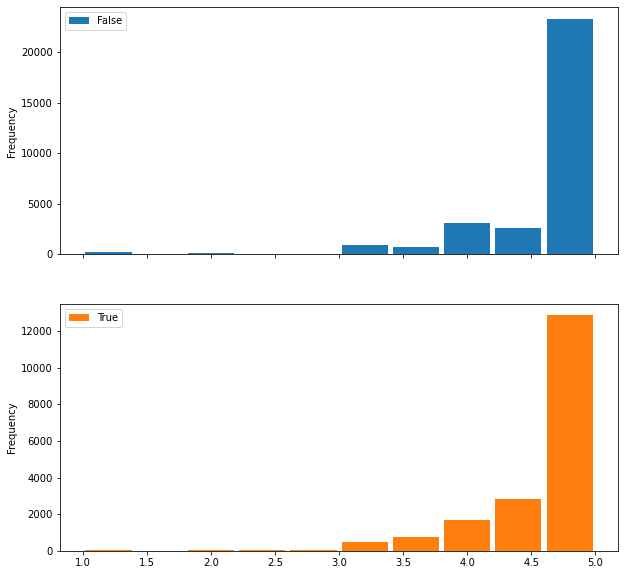

In [37]:
ax = df2.pivot(columns='active', values='avg_rating_of_driver').plot(kind='hist', subplots=True, rwidth=0.9, align='mid', figsize=(10,10))


The majority of drivers and passengers were rated well in both groups.

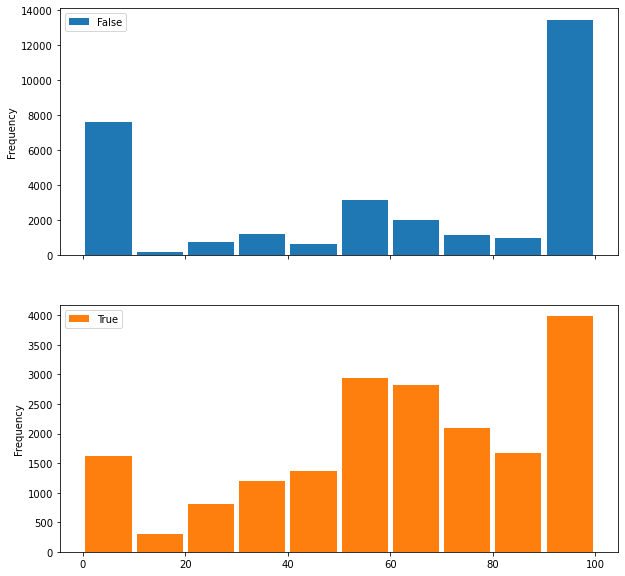

In [38]:
ax = df2.pivot(columns='active', values='weekday_pct').plot(kind='hist', subplots=True, rwidth=0.9, align='mid', figsize=(10,10))


For the majority of customers in both groups, either a customer spends a large percentage (100%) of their time using services on a weekday, or no little to no usage on weekdays (0%)

#### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.

In [39]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49997 non-null  object        
 1   trips_in_first_30_days  49997 non-null  int64         
 2   signup_date             49997 non-null  datetime64[ns]
 3   avg_rating_of_driver    49997 non-null  float64       
 4   avg_surge               49997 non-null  float64       
 5   last_trip_date          49997 non-null  datetime64[ns]
 6   phone                   49997 non-null  object        
 7   surge_pct               49997 non-null  float64       
 8   ultimate_black_user     49997 non-null  bool          
 9   weekday_pct             49997 non-null  float64       
 10  avg_dist                49997 non-null  float64       
 11  avg_rating_by_driver    49997 non-null  float64       
 12  active                  49997 non-null  bool  

To get the data ready for machine learning, the object columns (here, text data) needs to be recoded. 

In [40]:
# Create dummy variables for city and phone columns, which are currently 'object' columns
from sklearn.preprocessing import OneHotEncoder
dummies_city = pd.get_dummies(df2['city'])
dummies_city
dummies_phone = pd.get_dummies(df2['phone'])
dummies_phone

,Android,iPhone
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
49995,0,1
49996,0,1
49997,1,0
49998,0,1


In [41]:
# merging the dummy variable columns into the dataset and saving as new dataframe (df2)
df2 = pd.concat([df2, dummies_city], axis=1)
df2 = pd.concat([df2, dummies_phone], axis=1)
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,Astapor,King's Landing,Winterfell,Android,iPhone
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True,0,1,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,1,0,0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,1,0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True,0,1,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,0,0,1,1,0


In [42]:
df2 = df2.drop(['city', 'phone', 'signup_date', 'last_trip_date'], axis=1)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  49997 non-null  int64  
 1   avg_rating_of_driver    49997 non-null  float64
 2   avg_surge               49997 non-null  float64
 3   surge_pct               49997 non-null  float64
 4   ultimate_black_user     49997 non-null  bool   
 5   weekday_pct             49997 non-null  float64
 6   avg_dist                49997 non-null  float64
 7   avg_rating_by_driver    49997 non-null  float64
 8   active                  49997 non-null  bool   
 9   Astapor                 49997 non-null  uint8  
 10  King's Landing          49997 non-null  uint8  
 11  Winterfell              49997 non-null  uint8  
 12  Android                 49997 non-null  uint8  
 13  iPhone                  49997 non-null  uint8  
dtypes: bool(2), float64(6), int64(1), uint

In [44]:
# Preparing data further for ML model fitting, separating target variable from features

X = df2.drop(['active'], axis='columns') #feature columns
y = df2.active #target variable

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=True, random_state=42, stratify=y)

print('number of negative training samples: ', len(y_train[y_train==0]))
print('number of positive training samples: ', len(y_train[y_train==1]))
print('total number of  training samples: ', len(y_train))
print('total number of test samples: ', len(y_test))
print('number of negative test samples: ', len(y_test[y_test==0]))
print('number of positive test samples: ', len(y_test[y_test==1]))

#Confirming target variable counts
y.value_counts()
print(len(y[y==1]), 'out of ', len(y), ' customers (', round(len(y[y==1])*100/len(y),1), '%) remained active after 6 months.') 

number of negative training samples:  21836
number of positive training samples:  13161
total number of  training samples:  34997
total number of test samples:  15000
number of negative test samples:  9359
number of positive test samples:  5641
18802 out of  49997  customers ( 37.6 %) remained active after 6 months.


#### Since some algorithms require data to be scaled prior to use, and most of the time normalizing data will not have an effect on the outcome of those that do not require it, we will normalize the training and test data:


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<b>Build a predictive model</b>

Since one of the main goals of this analysis was to understand which factors (features) are the best predictors for retention, a model that can provide details about the most important features is desireable. For this reason, I chose logistic regression. Other models I considered were SVM (with kernel='linear', so that feature importance could be accessed) and random forest.I chose linear regression since 

In [46]:
#import models for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

lr=LogisticRegression(random_state = 42, solver='lbfgs')
svm = SVC(random_state=42, gamma='auto', probability=True, kernel='linear')
rf = RandomForestClassifier(random_state=42, n_estimators=100)
knn =  KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)

lr.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Calculate performance metrics of the different models

In [47]:
model = lr
y_train_preds = model.predict_proba(X_train_scaled)[:,1]


In [48]:
model = svm
y_train_preds_svm = model.predict_proba(X_train_scaled)[:,1]


In [49]:
model=rf
y_train_preds_rf = model.predict_proba(X_train_scaled)[:,1]


In [50]:
model = knn
y_train_preds_knn = model.predict_proba(X_train_scaled)[:,1]


In [51]:
model = xgb
y_train_preds_xgb = model.predict_proba(X_train_scaled)[:,1]


In [52]:
#Create functions to calculate performance metrics
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)


Logistic Regression Performance Metrics

AUC:
Train:0.760

Accuracy:
Train:0.718

Recall:
Train:0.493

Precision:
Train:0.671

Specificity
Train:0.854

Prevalence
Train:0.376


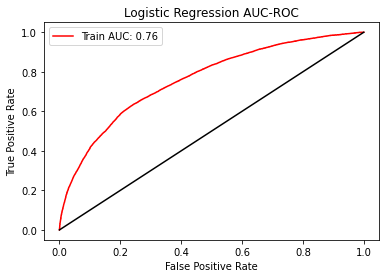

In [53]:
#LOGISTIC REGRESSION
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)

print("\nLogistic Regression Performance Metrics\n")
print('AUC:')
print('Train:%.3f'%auc_train)

print('\nAccuracy:')
print('Train:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))

print('\nRecall:')
print('Train:%.3f'%calc_recall(y_train, y_train_preds, thresh))

print('\nPrecision:')
print('Train:%.3f'%calc_precision(y_train, y_train_preds, thresh))

print('\nSpecificity')
print('Train:%.3f'%calc_specificity(y_train, y_train_preds, thresh))

print('\nPrevalence')
print('Train:%.3f'%calc_prevalence(y_train))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot([0,1],[0,1],'-k')
plt.title('Logistic Regression AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


SVM Performance Metrics

Train AUC:0.750
Train accuracy:0.692
Train recall:0.397
Train precision:0.649
Train specificity:0.870
Train prevalence:0.376


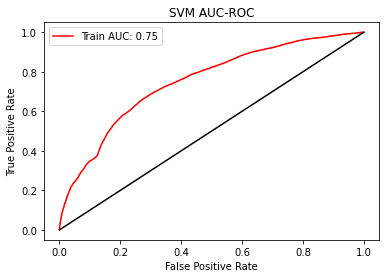

In [54]:
#svm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds_svm)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds_svm)
print("\nSVM Performance Metrics\n")
print('Train AUC:%.3f'%auc_train)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds_svm, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds_svm, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds_svm, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds_svm, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot([0,1],[0,1],'-k')
plt.title('SVM AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Random Forest Performance Metrics

Train AUC:1.000
Train accuracy:0.997
Train recall:0.994
Train precision:0.998
Train specificity:0.999
Train prevalence:0.376


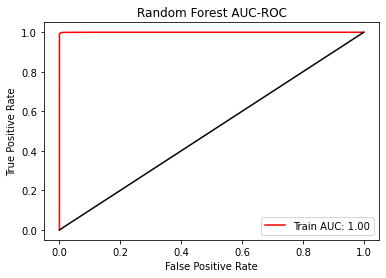

In [55]:
#RF
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds_rf)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds_rf)
print("\nRandom Forest Performance Metrics\n")
print('Train AUC:%.3f'%auc_train)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds_rf, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds_rf, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds_rf, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds_rf, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot([0,1],[0,1],'-k')
plt.title('Random Forest AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


KNN Performance Metrics

Train AUC:0.901
Train accuracy:0.818
Train recall:0.720
Train precision:0.780
Train specificity:0.878
Train prevalence:0.376


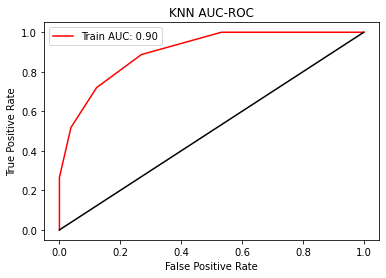

In [56]:
#knn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds_knn)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds_knn)
print("\nKNN Performance Metrics\n")
print('Train AUC:%.3f'%auc_train)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds_knn, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds_knn, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds_knn, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds_knn, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot([0,1],[0,1],'-k')
plt.title('KNN AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


XGBoost Performance Metrics

Train AUC:0.914
Train accuracy:0.842
Train recall:0.739
Train precision:0.822
Train specificity:0.904
Train prevalence:0.376


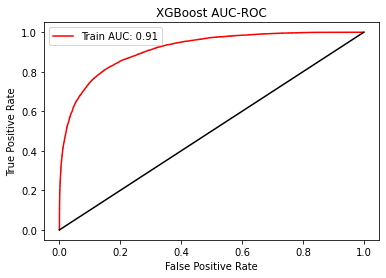

In [57]:
#xgb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds_xgb)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds_xgb)
print("\nXGBoost Performance Metrics\n")
print('Train AUC:%.3f'%auc_train)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds_xgb, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds_xgb, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds_xgb, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds_xgb, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot([0,1],[0,1],'-k')
plt.title('XGBoost AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Although random forest had the highest level of accuracy, I chose logistic regression as model of choice for this problem since it is quicker to optimize and its feature importance can be more clearly defined, and the basic model's accuracy and AUC-ROC were quite good at 71% and 0.76, respectively.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

logistic = LogisticRegression(random_state=42)

# define hyperparameter options
penalty = ['l1', 'l2']
C = [1, 10, 100, 1000, 10000, 100000]
class_weight = [{1:0.3, 0:0.7}, {1:0.5, 0:0.5}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga', 'lbfgs']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

# scoring is F1 = 2 * (precision * recall) / (precision + recall)
model = GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1,
                    cv = StratifiedKFold(n_splits=5, shuffle=True))

model.fit(X_train_scaled, y_train)

print('Best Score (F1): ' '{0:0.4f}'.format(model.best_score_))
print('Best Params: ', model.best_params_)
best_model = model.best_estimator_

best_model


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   41.9s finished


Best Score (F1): 0.6282
Best Params:  {'C': 10, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=10, class_weight={0: 0.3, 1: 0.7}, random_state=42,
                   solver='liblinear')

In [59]:
best_model.coef_


array([[ 9.05748713, -0.25994042, -0.35470453,  0.26535025,  0.82547264,
        -0.01881277, -2.86418795, -0.63744851, -0.64066706,  1.12579428,
        -0.12972375, -0.35894567,  0.71434913]])

In [60]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",best_model.coef_.transpose())
coef_table

,0,Coefs
0,trips_in_first_30_days,9.057487
1,avg_rating_of_driver,-0.259940
2,avg_surge,-0.354705
3,surge_pct,0.265350
4,ultimate_black_user,0.825473
5,weekday_pct,-0.018813
6,avg_dist,-2.864188
7,avg_rating_by_driver,-0.637449
8,Astapor,-0.640667
9,King's Landing,1.125794


Features with highest coefficients/most importance (in order of greatest to least): 
1. trips_in_first_30_days
2. King's Landing
3. iPhone
4. ultimate_black_user

In [61]:
y_pred = lr.predict(X_test_scaled)
lr.score(X_test_scaled, y_test)

0.7138666666666666

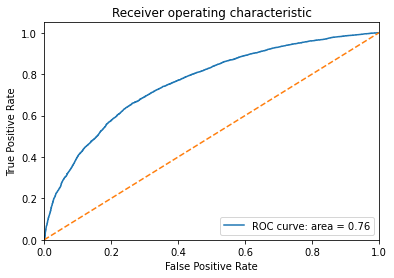

              precision    recall  f1-score   support

        True       0.66      0.49      0.56      5641
       False       0.73      0.85      0.79      9359

    accuracy                           0.71     15000
   macro avg       0.70      0.67      0.67     15000
weighted avg       0.71      0.71      0.70     15000

Confusion Matrix 

 [[2753 2888]
 [1404 7955]]


In [62]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, auc
y_test_prob = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_test_prob[:,1])
roc_auc=auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve: area = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(classification_report(y_test, y_pred, labels=[True,False])) 
print('Confusion Matrix \n\n', confusion_matrix(y_test, y_pred, labels=[True,False]))

<b>3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

<b>Summary</b>
<br>
One of the main goals of this analysis was to understand which factors are the best predictors for retention, so a model that could provide details about the most important features was desireable. For this reason, I chose logistic regression first. Other models I considered were SVM (with kernel='linear', so that feature importance could be accessed) and random forest, and ran those predictive models to see how they fared in comparison to logistic regression. Although random forest had the highest level of accuracy, I still chose logistic regression as model of choice for this problem since it is quicker to optimize,  its feature importance can be more clearly defined, and the basic model's accuracy and AUC-ROC were decent at 71% and 0.76, respectively.
<br>
In addition to logistic regression, random forest, and SVM, I the data was processed using K-nearest neighbors and and XGBoost models, to see their performance for possible future use (like if the company wanted to predict how many active customers there could be without need of knowing the specific features of greatest importance). Both of those models had much higher accuracy and AUC-ROC, with XGBoost ranking highest, with ROC-AUC of 0.91 and accuracy of 84%.
<br>

<b>Takeaways & Recommendations</b>
<br>
Based on the logistic regression model, the most important features determining whether a customer remains an active user after 6 months included (in order of importance): 
<br>
1. trips_in_first_30_days:
<br>
Trips in the first 30 days was by far the greatest predictor. Ultimate could leverage this feature by offering great promotions to new customers to encourage repeat usage within that first month of using the app.
<br>
<br>
2. King's Landing:
<br>
Interestingly, customers who signed up in King's Landing were more strongly associated with app usage. This could be related to less people owning cars/greater need for rides, better advertising in that area, or app popularity. It could also be related to a higher income population. These factors could be explored further and then determine if more marketing/promotions should be done in Kings Landing to capture more of the market, or if more marketing/promotions should be done in the other locations.
<br>
<br>
3. iPhone:
<br>
Customers using iPhones had a greater level of usage. This could be related to income level as well (iPhones in general can be more expensive than Android). Additionally, the performance of the app on Android should be examined. The company could reach out to Android users to receive feedback. Online reviews could also be examined to see what issues android users may be having.
<br>
<br>
4. ultimate_black_user:
<br>
Customers who used the ultimate black service in their first 30 days were more likely to become active customers. This again points to possible relationship to customer income, but could also be related to overall customer satisfaction. Heavy discounts on ultimate black cars could be offered in the first 30 days to encourage new customers to try the service.